# Comparison between true labels and shuffled labels accuracy (subject wise and mean) for decision and response.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [3]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


In [4]:
'''Variables'''
sigma = 2 # for gaussian filter. Sigma 1 seems to have a lot of peaks still so I increased it to 2
timepoints = time_labels.shape[0]

In [5]:
df_deci = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_deci_rf/timepoint_decision_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint]})
df_deci = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

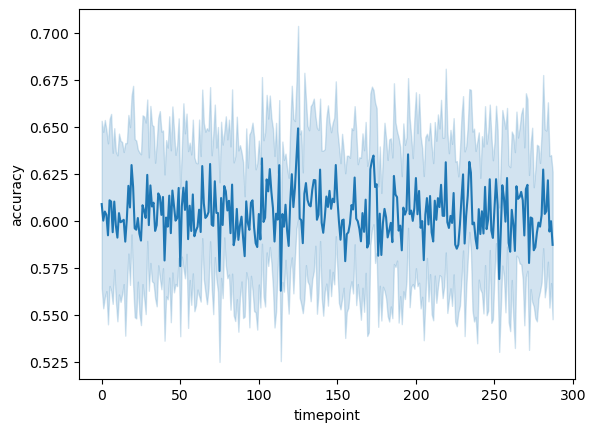

In [6]:
sns.lineplot(x="timepoint", y="accuracy", data=df_deci)

In [7]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_resp_rf/timepoint_response_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint]})
df_resp = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

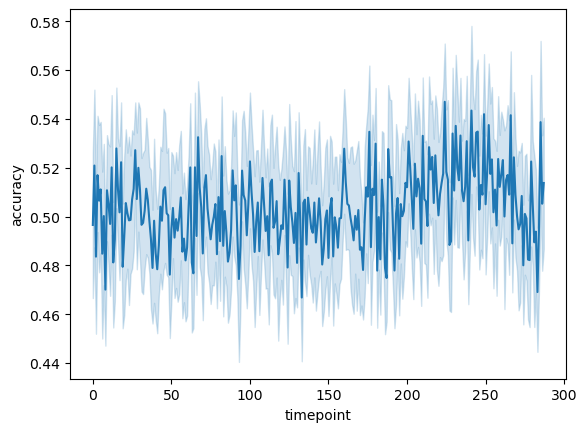

In [8]:
sns.lineplot(x="timepoint", y="accuracy", data=df_resp, 
             # err_style="bars", errorbar=('ci', 95)
             )

In [9]:
df_deci = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_deci_rf/timepoint_decision_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'No'})
data = np.load('results_deci_rf/timepoint_decision_shuffled_31.npy', allow_pickle=True)
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'Yes'})
df_deci = pd.DataFrame(rows)
grouped = df_deci.groupby('subject')
df_deci['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

<Axes: xlabel='timepoint', ylabel='accuracy_filtered'>

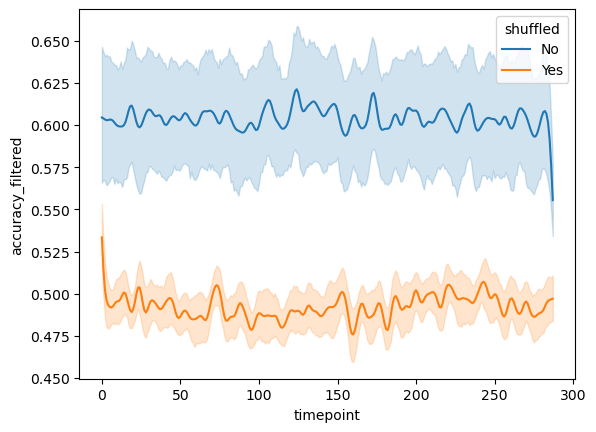

In [10]:
sns.lineplot(x="timepoint", y="accuracy_filtered", data=df_deci, hue='shuffled')

In [11]:
# df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
# data = np.load('results_resp_rf/timepoint_response_weightless_0.npy', allow_pickle=True)
# timepoints = len(data[0])
# rows = []
# for subject in range(26):
#     for timepoint in range(timepoints):
#         rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'No'})
# 
# data = np.load('results_resp_rf/timepoint_response_shuffled_58.npy', allow_pickle=True)
# for subject in range(26):
#     for timepoint in range(timepoints):
#         rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'Yes'})
# df_resp = pd.DataFrame(rows)
# grouped = df_resp.groupby('subject')
# df_resp['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

In [12]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_resp_rf/timepoint_response_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []

amount_of_experiments = 100

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint], 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(amount_of_experiments):
    data = np.load('results_resp_rf/timepoint_response_shuffled_{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= amount_of_experiments

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint], 
            'shuffled': 'Yes'
            })
df_resp = pd.DataFrame(rows)
grouped = df_resp.groupby('subject')
df_resp['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

In [13]:
df_resp

,subject,timepoint,time,accuracy,shuffled,accuracy_filtered
0,0,0,-0.50,0.480000,No,0.531247
1,0,1,-0.48,0.560000,No,0.531167
2,0,2,-0.46,0.640000,No,0.527562
3,0,3,-0.44,0.440000,No,0.518777
4,0,4,-0.42,0.520000,No,0.507159
...,...,...,...,...,...,...
14971,25,283,5.16,0.507308,Yes,0.505048
14972,25,284,5.18,0.504231,Yes,0.505840
14973,25,285,5.20,0.496923,Yes,0.506956
14974,25,286,5.22,0.517500,Yes,0.508231


Text(0.5, 0, 'time (s)')

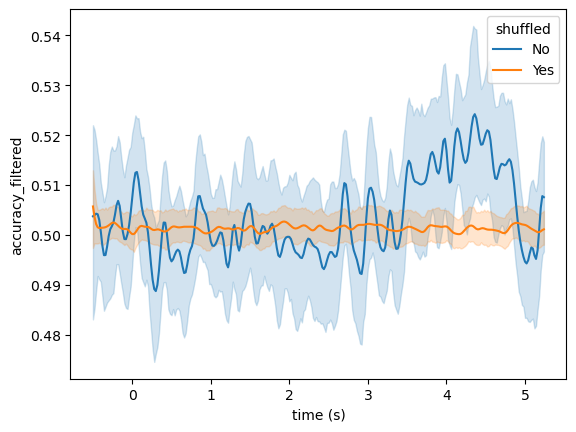

In [14]:
sns.lineplot(x="time", y="accuracy_filtered", data=df_resp, hue='shuffled')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

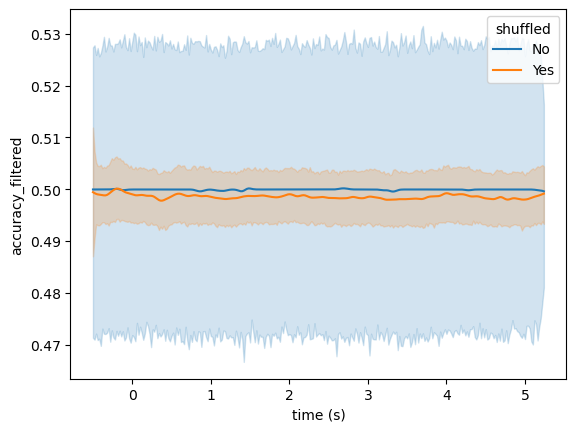

In [52]:
df_resp_svc = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_resp_svc/timepoint_response_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint], 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(10):
    data = np.load('results_resp_svc/timepoint_response_shuffled_{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= 10

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint], 
            'shuffled': 'Yes'
            })
df_resp_svc = pd.DataFrame(rows)
grouped = df_resp_svc.groupby('subject')
df_resp_svc['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))
sns.lineplot(x="time", y="accuracy_filtered", data=df_resp_svc, hue='shuffled')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

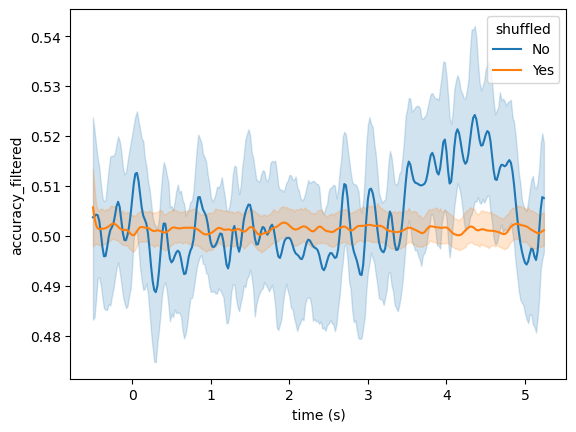

In [17]:
sns.lineplot(x="time", y="accuracy_filtered", data=df_resp, hue='shuffled')
plt.xlabel('time (s)')

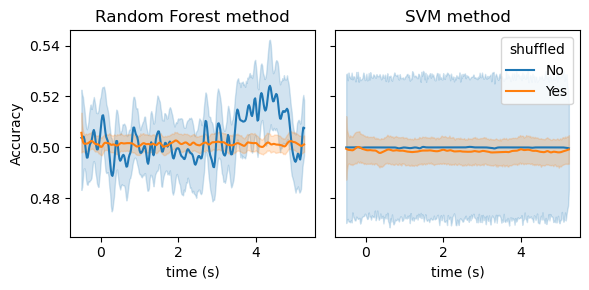

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_resp['model'] = 'df_resp'
df_resp_svc['model'] = 'df_resp_svc'

# Concatenate the dataframes
combined_df = pd.concat([df_resp, df_resp_svc])

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)

# Plot for df_resp
sns.lineplot(x='time', y='accuracy_filtered', data=df_resp, hue='shuffled', ax=axes[0], legend=False)
axes[0].set_title('Random Forest method')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Accuracy')

# Plot for df_resp_svc
sns.lineplot(x='time', y='accuracy_filtered', data=df_resp_svc, hue='shuffled', ax=axes[1])
axes[1].set_title('SVM method')
axes[1].set_xlabel('time (s)')
axes[1].set_ylabel('Accuracy')


# Adjust plot spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# DECI

In [44]:
df_deci = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_deci_rf/timepoint_decision_shuffled_31.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []

amount_of_experiments = 10

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint], 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(amount_of_experiments):
    data = np.load('results_deci_rf/timepoint_decision_shuffled{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= amount_of_experiments

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint], 
            'shuffled': 'Yes'
            })
df_deci = pd.DataFrame(rows)
grouped = df_deci.groupby('subject')
df_deci['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

In [45]:
df_deci_svc = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_deci_svc/timepoint_decision_12.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint] -0.005, 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(10):
    data = np.load('results_deci_svc/timepoint_decision_shuffled_{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= 12



for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint] -0.005, 
            'shuffled': 'Yes'
            })
df_deci_svc = pd.DataFrame(rows)
grouped = df_deci_svc.groupby('subject')
df_deci_svc['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))


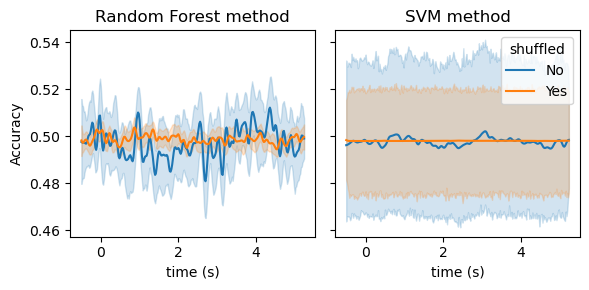

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataframes df_resp and df_resp_svc with the required columns
# You can merge the dataframes and add an identifier column to distinguish them
df_deci['model'] = 'df_deci'
df_deci_svc['model'] = 'df_deci_svc'

# Concatenate the dataframes
combined_df = pd.concat([df_deci, df_deci_svc])

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)

# Plot for df_resp
sns.lineplot(x='time', y='accuracy_filtered', data=df_deci, hue='shuffled', ax=axes[0], legend=False)
axes[0].set_title('Random Forest method')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Accuracy')

# Plot for df_resp_svc
sns.lineplot(x='time', y='accuracy_filtered', data=df_deci_svc, hue='shuffled', ax=axes[1])
axes[1].set_title('SVM method')
axes[1].set_xlabel('time (s)')
axes[1].set_ylabel('Accuracy')

# Add a common legend for both subplots
# handles, labels = axes[1].get_legend_handles_labels()

# Adjust plot spacing
plt.tight_layout()

# Show the plot
plt.show()